# Auditory Sound Processing - Part III: Linear Filters (FIR & IIR)

In [145]:
# Standard packages
import numpy as np
import matplotlib.pyplot as plt

# Special imports
from scipy import signal

There are two groups of linear filters:

* *Finite Impulse Response (FIR)*-filters
* *Infinite Impulse Response (IIR)*-filters

## Sample data

We will use the following data to demonstrate the effect of linear filters on these input data:

### Noisy Sine

(1.4, 2.7)

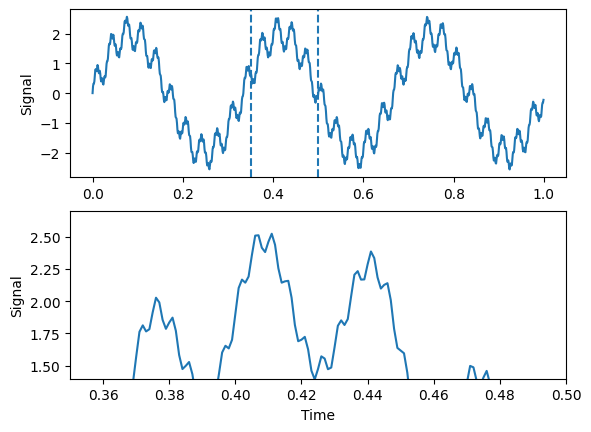

In [146]:
rate = 1000
t = np.arange(0, 1, 1/rate)
freqs = [3, 30, 200]
amps = [2, 0.5, 0.1]
sig = np.zeros(t.shape)

for freq, amp in zip(freqs, amps):
    omega = 2 * np.pi * freq
    sig += amp * np.sin(omega * t)

fig, axs = plt.subplots(2, 1)

axs[0].plot(t, sig)
axs[0].set_ylabel('Signal')
axs[0].axvline(0.35, ls='dashed')
axs[0].axvline(0.5, ls='dashed')

axs[1].plot(t, sig)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Signal')
axs[1].set_xlim([0.35, 0.5])
axs[1].set_ylim([1.4, 2.7])


### Impulse

(-0.05, 1.05)

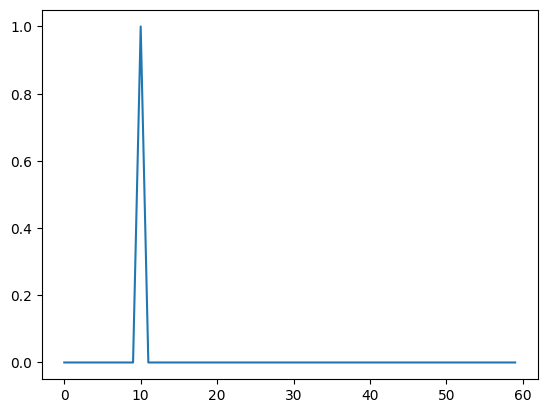

In [147]:
impulse = np.zeros(60)
impulse[10] = 1

plt.plot(impulse)
plt.ylim(-0.05, 1.05)

## Finite Impulse Response-Filters (FIR)

FIR-filters are essentially weighted moving-average filters:

<img src='data/images/MovingFilter.jpg' width=500>

Note the following aspects of FIR-filters:

* the input *feeds forward* to the output (i.e. there is no feedback)
* compared to the input, the output is delayed
* an *impulse* in the input (i.e. an input where $x_i=1$, and all other x's are 0) has only a finite effect on the output.

FIR-filters are amazingly versatile, and can be used to smooth and differentiate data. For example, if you have not yet come in contact with *Savitzky-Golay*-filters, check them out: it is may favorite filter, and can be used to simultaneously smooth the data, and calculate an arbitrary derivative.

### Example 1: Moving Average

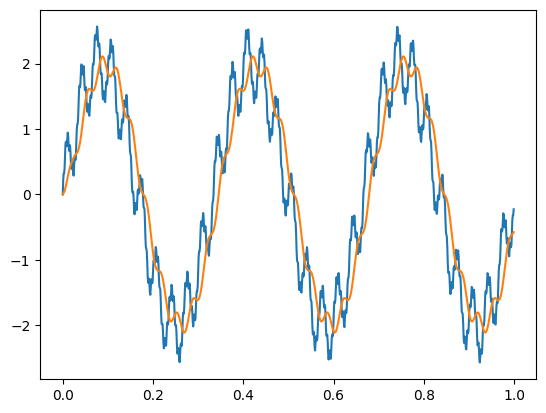

In [148]:
a_mov_avg = 1                        # for FIR-filters, "a" is always "1"
b_mov_avg = np.ones(25)/25           # the weight-coefficients

sig_mov_avg = signal.lfilter(b_mov_avg, a_mov_avg, sig)  # apply the filter to the input

plt.plot(t, sig)
plt.plot(t, sig_mov_avg)

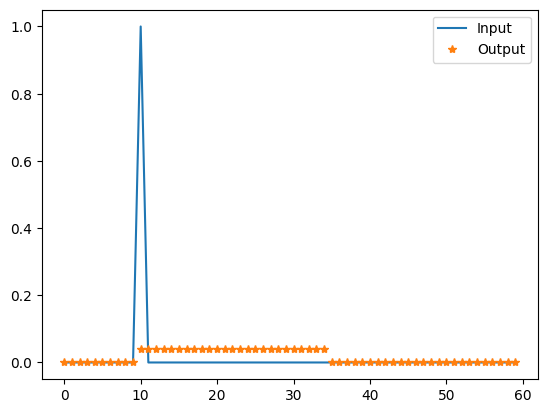

In [149]:
imp_mov_avg = signal.lfilter(b_mov_avg, a_mov_avg, impulse)

plt.plot(impulse)
plt.plot(imp_mov_avg, '*')
plt.legend(['Input', 'Output'])

## Infinite Impulse Response-Filters (IIR)

In contrast to FIR-filters, IIR-filters can also include a *feedback* from the output to the input:

<img src='data/images/IIR_filter.jpg' width=500>

### Example 1: Impulse-Filtering

As the name implies, an impulse input to an IIR-filter can have an arbitrarily long effect on the output. For example, take the *exponential decay filter*:

\begin{equation}
    y_i = \alpha * x_i + (1-\alpha) * y_{i-1}
\end{equation}

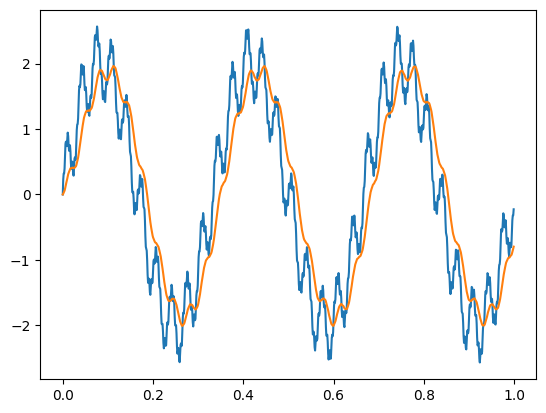

In [150]:
alpha = 0.1
a_exp_decay = [1, -(1-alpha)]
b_exp_decay = [alpha]

signal_exp_decay = signal.lfilter(b_exp_decay, a_exp_decay, x)  # apply the filter to the input

plt.figure()
plt.plot(t, x)
plt.plot(t, y)

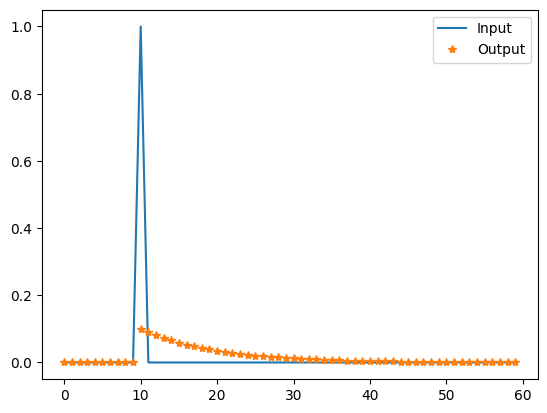

In [151]:
imp_exp_decay = signal.lfilter(b_exp_decay, a_exp_decay, impulse)

plt.plot(impulse)
plt.plot(imp_exp_decay, '*')
plt.legend(['Input', 'Output'])

### Example 2:  Lowpass

A filter-type frequently used for bandpass-filtering are *Butterworth* filters.

First, we demonstrate a low-pass filter:

In [152]:
# Filter coefficients
Nyq = rate/2
cutoff = 10
b_lp, a_lp = signal.butter(4, cutoff/Nyq)

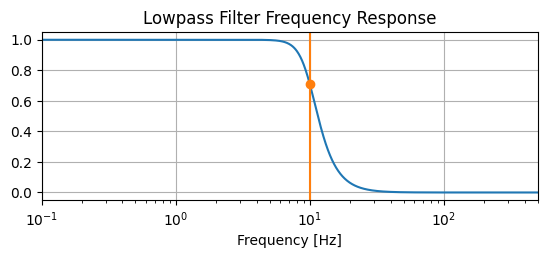

In [153]:
# Plot the frequency response.
w, h = signal.freqz(b_lp, a_lp, worN=8000)

plt.subplot(2, 1, 1)
plt.plot(0.5*rate*w/np.pi, np.abs(h))
plt.semilogx(cutoff, 0.5*np.sqrt(2), 'o')
plt.axvline(cutoff, color='C1')
plt.xlim(1e-1, 0.5*rate)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

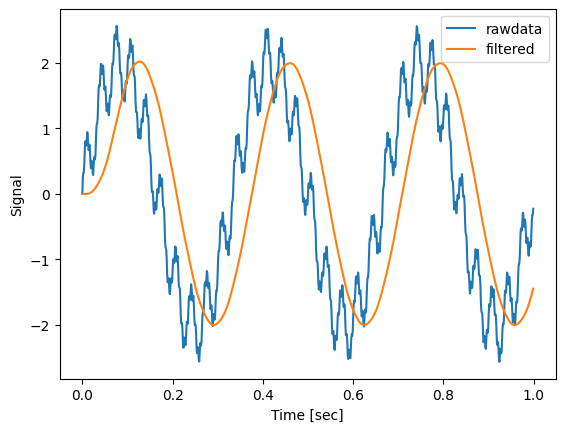

In [154]:
# Apply the filter to the noisy data
sig_lp = signal.lfilter(b_lp, a_lp, sig)

plt.plot(t, sig, label='rawdata')
plt.plot(t, sig_lp, label='filtered')
plt.xlabel('Time [sec]')

plt.ylabel('Signal')
plt.legend()

### Example 3: "filtfilt" - Lowpass, without delay

As you can see in the example above, *lfilter* induces a delay. For offline data analysis, this can be eliminated, by filtering the data twice: once forward, and once backward. This eliminates the delay, *but doubles the order of the filter*!

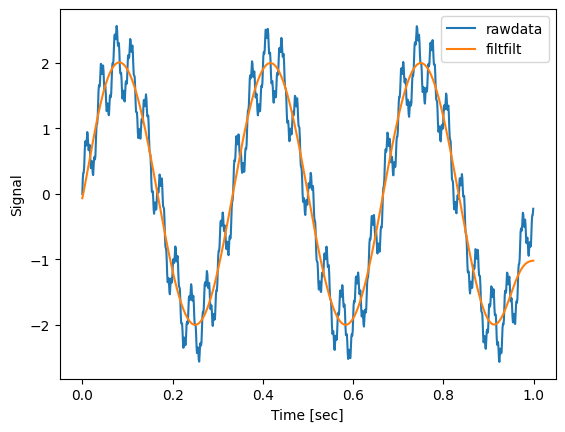

In [155]:
ffiltered = signal.filtfilt(b_lp, a_lp, sig)

plt.plot(t, sig, label='rawdata')
plt.plot(t, ffiltered, label='filtfilt')

plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.legend()

### Example 4: Bandpass

Our sample signal consists of two different frequencies. A bandpass, which contains only the upper frequency, should eliminate the lower frequency:

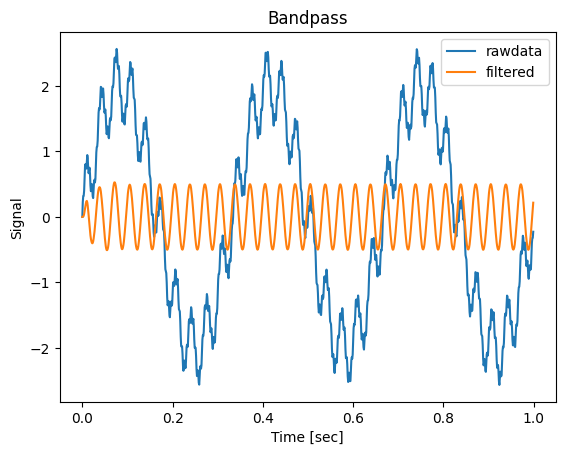

In [156]:
b_bp, a_bp = signal.butter(4, np.r_[15, 100]/Nyq, 'bandpass')
filtered = signal.lfilter(b_bp, a_bp, x)

plt.plot(t, x, label='rawdata')
plt.plot(t, filtered, label='filtered')

plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.title('Bandpass')
plt.legend()

### Example 4: Gammatone Filters

Technically, a gammatone filter is a linear filter described by an impulse response that is the product of a gamma distribution and sinusoidal tone. 

<img src='data/images/Sample_gammatone.svg.png' style="width: 400px;">

With suitable coefficients, a gammatone filter simluates the movement of one location of the basilar membrane, which is elicited by a given sound-input. It is therefore a widely used model of auditory filters in the 
auditory system.

<img src='data/images/basilar_membrane.png' style="width: 600px;"/>


[Soundproc_2_TimeDependence](Soundproc_2_TimeDependence.ipynb)<img src="data/images/Forward_Backward.png" align="middle"> [Soundproc_4_Stimulation](Soundproc_4_Stimulation.ipynb)

    Author: Thomas Haslwanter
    Date: Oct 26, 2024

<img src="data/images/CCA_40.png">

*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.